# TALLER SIMBIOSIS
En este taller el objetivo es a partir de un dataset que contiene datos sobre la presencia de ciertas bacterias en un paciente, lograr identificar si ese paciente padece de diabetes, cirrosis o obecidad.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simbiontes/biomedata_train_abundance.csv
/kaggle/input/simbiontes/biomedata_test_abundance.csv
/kaggle/input/simbiontes/biomedata_train_marker.csv
/kaggle/input/simbiontes/master_biome_sample.csv
/kaggle/input/simbiontes/biomedata_test_marker.csv


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df_abundance = pd.read_csv("/kaggle/input/simbiontes/biomedata_train_abundance.csv")
df_marker = pd.read_csv("/kaggle/input/simbiontes/biomedata_train_marker.csv")

# Preprocesamiento

In [4]:
df_abundance.fillna(0, inplace= True)
df_abundance.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Pseudomonadaceae|g__Pseudomonas|s__Pseudomonas_fragi,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Pseudoxanthomonas|s__Pseudoxanthomonas_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Rhodanobacter|s__Rhodanobacter_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_citri,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Brachyspiraceae|g__Brachyspira|s__Brachyspira_pilosicoli,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis
0,0,1.0,Quin_gut_liver_cirrhosis,china,female,0.02959,0.00955,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,Quin_gut_liver_cirrhosis,china,male,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,Quin_gut_liver_cirrhosis,china,male,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,Quin_gut_liver_cirrhosis,china,female,0.29306,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,Quin_gut_liver_cirrhosis,china,male,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_abundance.info()
df_abundance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Columns: 717 entries, Unnamed: 0 to k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis
dtypes: float64(713), int64(1), object(3)
memory usage: 3.4+ MB


,Unnamed: 0,Cirrhosis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Pseudomonadaceae|g__Pseudomonas|s__Pseudomonas_fragi,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Pseudoxanthomonas|s__Pseudoxanthomonas_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Rhodanobacter|s__Rhodanobacter_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_citri,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Brachyspiraceae|g__Brachyspira|s__Brachyspira_pilosicoli,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis
count,621.000000,621.000000,621.000000,621.00000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,...,621.0,621.000000,621.000000,621.0,621.0,621.000000,621.000000,621.000000,621.000000,621.000000
mean,310.000000,0.141707,0.134980,0.01213,0.004457,0.000204,0.001529,0.000728,0.000014,0.001153,...,0.0,0.000015,0.000001,0.0,0.0,0.000047,0.000005,0.000005,0.000256,0.000019
std,179.411538,0.349030,0.592962,0.08049,0.049055,0.001524,0.013730,0.005011,0.000287,0.005223,...,0.0,0.000378,0.000029,0.0,0.0,0.001161,0.000113,0.000118,0.006382,0.000390
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,310.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,465.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,620.000000,1.000000,7.733550,1.36940,1.023360,0.025480,0.303540,0.105130,0.006820,0.074190,...,0.0,0.009430,0.000730,0.0,0.0,0.028930,0.002820,0.002930,0.159050,0.009510


In [6]:
df_marker.fillna(0, inplace = True)
df_marker.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,gi|103485498|ref|NC_008048.1|:c103928-103680,gi|104773257|ref|NC_008054.1|:116729-117526,gi|104773257|ref|NC_008054.1|:1737697-1738332,gi|104773257|ref|NC_008054.1|:266275-267207,gi|104773257|ref|NC_008054.1|:294312-294563,...,gi|89892746|ref|NC_007907.1|:c3938880-3937900,gi|90581188|ref|NZ_AAOJ01000014.1|:76701-76972,gi|91774356|ref|NC_007947.1|:c416906-416292,gi|92112136|ref|NC_007963.1|:485202-485741,gi|92115633|ref|NC_007964.1|:c3043219-3042695,gi|93004831|ref|NC_007969.1|:1110067-1110642,gi|93004831|ref|NC_007969.1|:1986617-1987513,gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444,gi|94676460|ref|NC_007984.1|:c601098-600646,gi|94991497|ref|NC_008023.1|:148294-148941
0,0,1.0,Quin_gut_liver_cirrhosis,china,female,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,Quin_gut_liver_cirrhosis,china,female,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y_abundance = df_abundance[["Diabetes", "Cirrhosis", "Obesity"]]
df_abundance.drop(["Diabetes", "Cirrhosis", "Obesity", "code_study", "country", "gender"], axis=1, inplace = True)
y_marker = df_marker[["Diabetes", "Cirrhosis", "Obesity"]]
df_marker.drop(["Diabetes", "Cirrhosis", "Obesity", "code_study", "country", "gender"], axis = 1,inplace = True)

In [8]:
y_marker.head()

,Diabetes,Cirrhosis,Obesity
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0


In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree

def PCA_iteration(step,X_train, X_test, y_train, y_test, iterations = 200 ):
    num_features = 50
    num_features_list = []
    svm_score_list = []
    tree_score_list = []
    lr_score_list = []
    while num_features < min(len(X_train.columns), len(X_train.index)):
        num_features_list.append(num_features)
        pca = PCA(n_components=num_features)
        pca.fit(X_train)
        X_temp = pca.transform(X_train)
        X_test_temp = pca.transform(X_test)
        SVM_model = svm.SVC()
        SVM_model.fit(X_temp, y_train)
        LR_model = LogisticRegression(random_state=0, max_iter=iterations).fit(X_temp, y_train)
        TREE_model = DecisionTreeClassifier()
        TREE_model.fit(X_temp, y_train)
        svm_score_list.append(SVM_model.score(X_test_temp, y_test))
        tree_score_list.append(TREE_model.score(X_test_temp, y_test))
        lr_score_list.append(LR_model.score(X_test_temp, y_test))
        num_features += step
    return num_features_list, svm_score_list, tree_score_list, lr_score_list


In [10]:
def plot_methods(num_features_list, svm_score_list, tree_score_list, lr_score_list):
    plt.figure(figsize=(10, 7), dpi=80)
    plt.plot(num_features_list, tree_score_list, label = "Tree")
    plt.plot(num_features_list, svm_score_list, label = "SVM")
    plt.plot(num_features_list, lr_score_list, label = "LogReg")
    plt.ylabel("Score")
    plt.xlabel("Numero de Features")
    plt.legend(loc='best')
    plt.show()

# Búsqueda de métodos

## Sin PCA

### Dataset Abundance

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_abundance)

In [12]:
y_Cirrhosis = y_marker["Cirrhosis"]
y_Diabetes = y_marker["Diabetes"]
y_Obesity = y_marker["Obesity"]

In [13]:
#CIRRHOSIS
X_train, X_test, y_train, y_test= train_test_split(df_abundance, y_Cirrhosis, test_size=0.2, random_state=0)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list = PCA_iteration(50, X_train_scaled, X_test_scaled, y_train, y_test)

#DIABETES
X_train, X_test, y_train, y_test= train_test_split(df_abundance, y_Diabetes, test_size=0.2, random_state=0)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list = PCA_iteration(50, X_train_scaled, X_test_scaled, y_train, y_test)

#OBESIDAD
X_train, X_test, y_train, y_test= train_test_split(df_abundance, y_Obesity, test_size=0.2, random_state=0)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list = PCA_iteration(50, X_train_scaled, X_test_scaled, y_train, y_test)


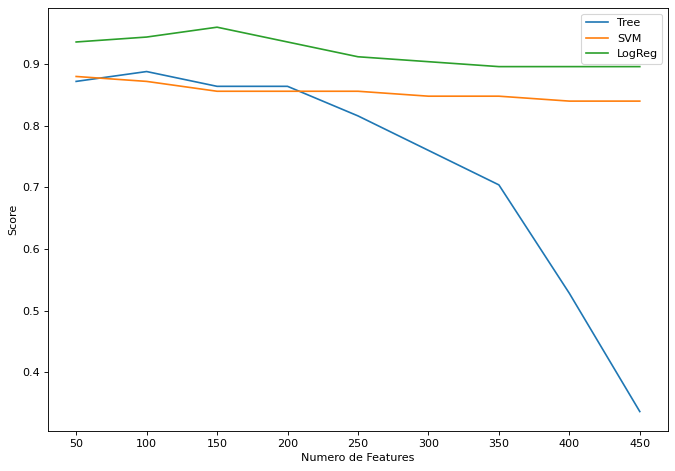

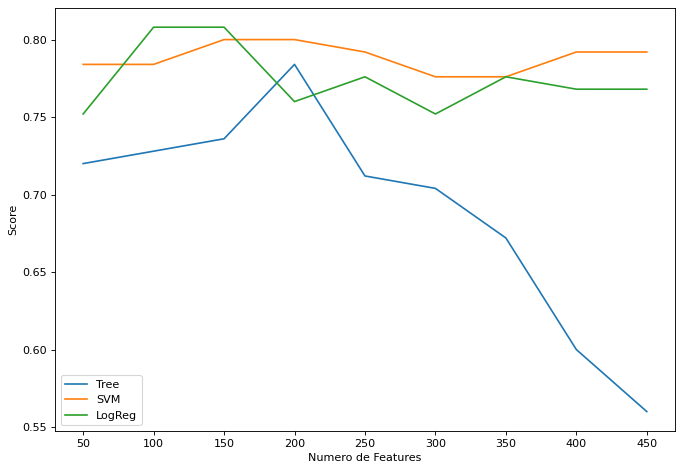

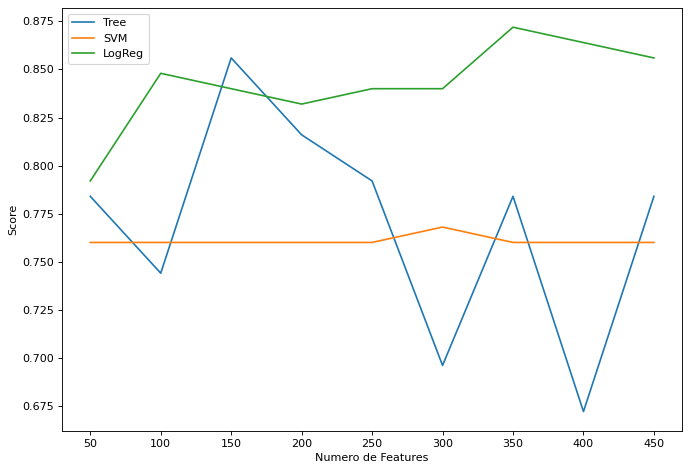

In [14]:

plot_methods(cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list)
plot_methods(dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list)
plot_methods(obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list)


### Dataset Marker

In [15]:
y_Cirrhosis = y_marker["Cirrhosis"]
y_Diabetes = y_marker["Diabetes"]
y_Obesity = y_marker["Obesity"]

In [16]:

#CIRRHOSIS
X_train, X_test, y_train, y_test= train_test_split(df_marker, y_Cirrhosis, test_size=0.2, random_state=0)
cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list = PCA_iteration(50, X_train, X_test, y_train, y_test,iterations= 1000)
#DIABETES
X_train, X_test, y_train, y_test= train_test_split(df_marker, y_Diabetes, test_size=0.2, random_state=0)
dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list = PCA_iteration(50, X_train, X_test, y_train, y_test,iterations= 1000)
#OBESITY
X_train, X_test, y_train, y_test= train_test_split(df_marker, y_Obesity, test_size=0.2, random_state=0)
obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list = PCA_iteration(50, X_train, X_test, y_train, y_test,iterations= 1000)


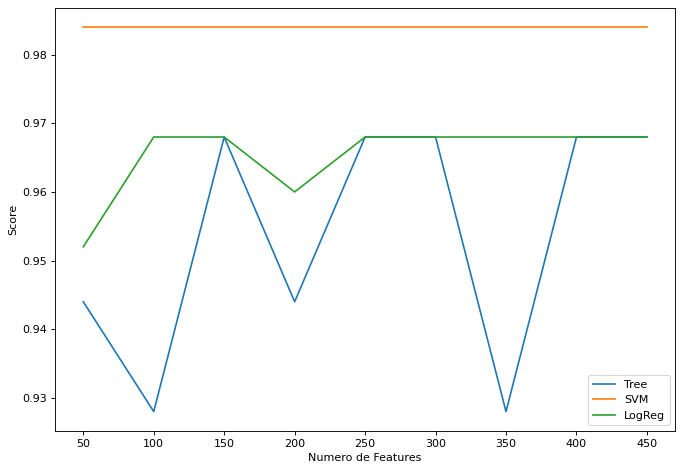

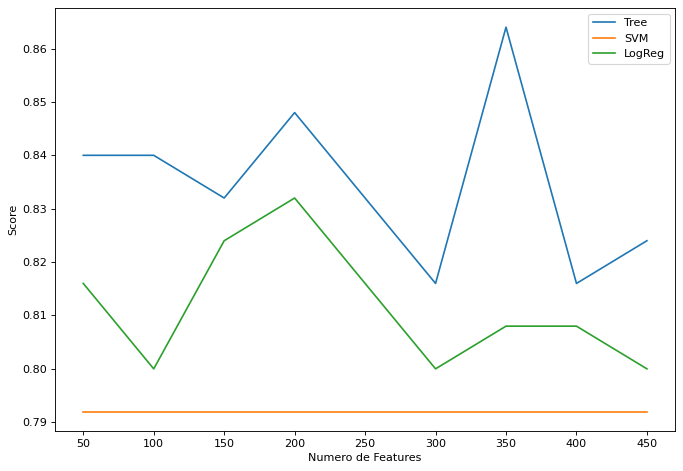

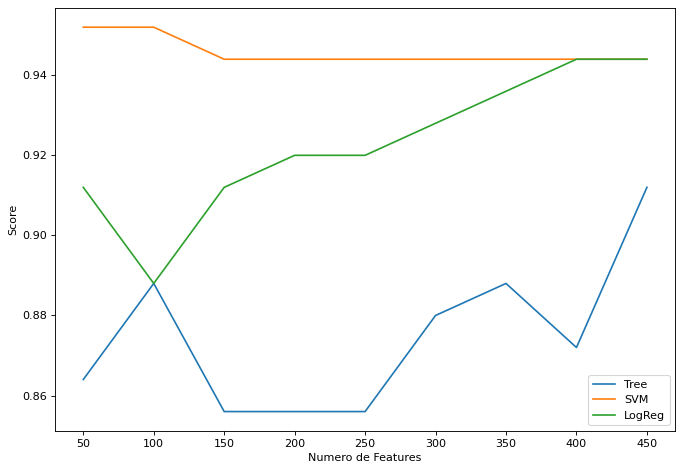

In [17]:

plot_methods(cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list)
plot_methods(dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list)
plot_methods(obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list)


### Datasets Unidos

In [18]:
abundance_scaled = pd.DataFrame(scaler.transform(df_abundance), columns = df_abundance.columns)
df_all = pd.concat([df_marker, abundance_scaled], axis = 1)

In [19]:

#CIRRHOSIS
X_train, X_test, y_train, y_test= train_test_split(df_all, y_Cirrhosis, test_size=0.2, random_state=0)
cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list = PCA_iteration(50, X_train, X_test, y_train, y_test,iterations= 1000)
#DIABETES
X_train, X_test, y_train, y_test= train_test_split(df_all, y_Diabetes, test_size=0.2, random_state=0)
dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list = PCA_iteration(50, X_train, X_test, y_train, y_test,iterations= 1000)
#OBESITY
X_train, X_test, y_train, y_test= train_test_split(df_all, y_Obesity, test_size=0.2, random_state=0)
obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list = PCA_iteration(50, X_train, X_test, y_train, y_test,iterations= 1000)


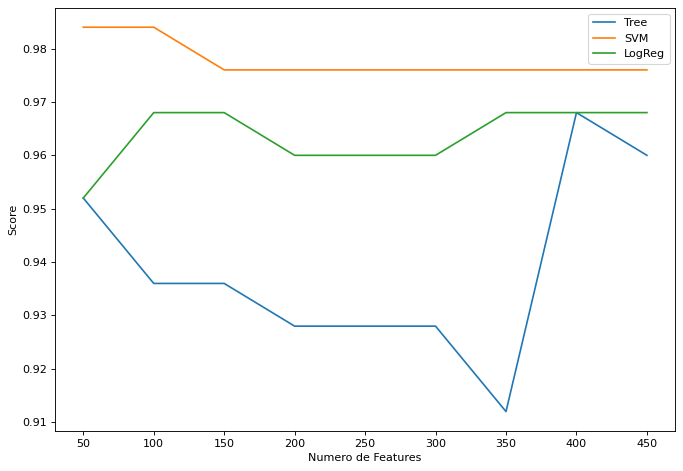

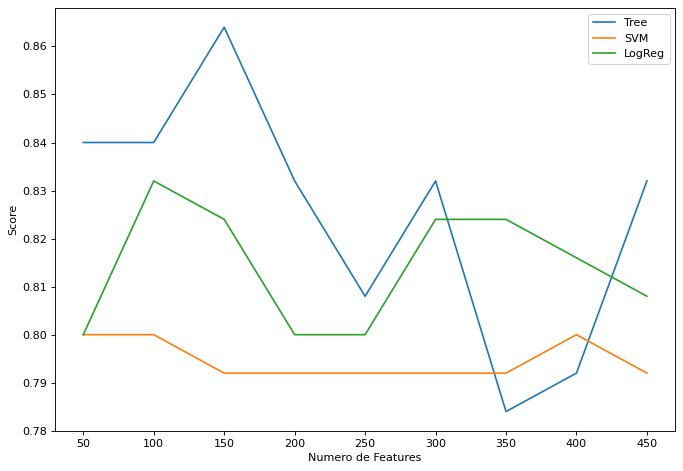

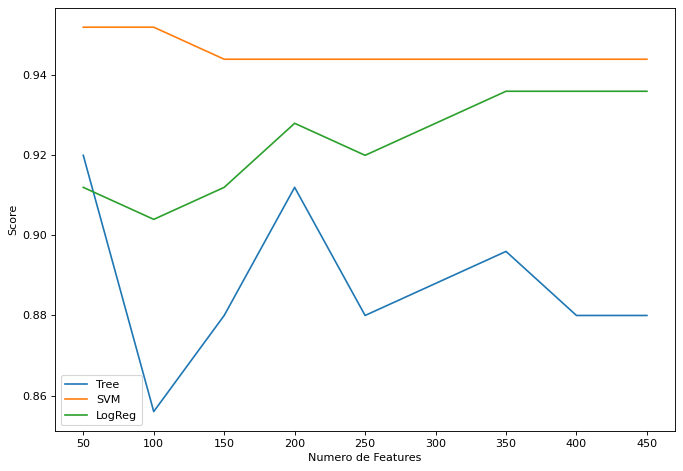

In [20]:

plot_methods(cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list)
plot_methods(dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list)
plot_methods(obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list)


## Pca con Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score


def PCA_CV_iteration(step, X, y, iterations=200):
    num_features = 50
    num_features_list = []
    svm_score_list = []
    tree_score_list = []
    lr_score_list = []
    while num_features < min(len(X.columns), len(X.index)):
        num_features_list.append(num_features)
        #APLICAMOS PCA
        pca = PCA(n_components=num_features)
        pca.fit(X)
        X_temp = pca.transform(X)

        #CV SVM
        SVM_model = svm.SVC()
        svm_score_list.append(np.mean(cross_val_score(SVM_model, X_temp, y, cv =5)))
        #CV LOGISTC REGRESSION
        LR_model = LogisticRegression(random_state=0, max_iter = iterations)
        lr_score_list.append(np.mean(cross_val_score(LR_model,X_temp,y, cv = 5)))

        #CV DECITION TREE
        TREE_model = DecisionTreeClassifier()
        tree_score_list.append(np.mean(cross_val_score(TREE_model, X_temp, y, cv = 5)))

        num_features += step
    return num_features_list, svm_score_list, tree_score_list, lr_score_list

### Dataset Abundance

In [22]:
X_scaled = pd.DataFrame(scaler.transform(df_abundance), columns = df_abundance.columns)

In [23]:

cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list = PCA_CV_iteration(50, X_scaled, y_Cirrhosis)
dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list = PCA_CV_iteration(50, X_scaled, y_Diabetes)
obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list = PCA_CV_iteration(50, X_scaled, y_Obesity)


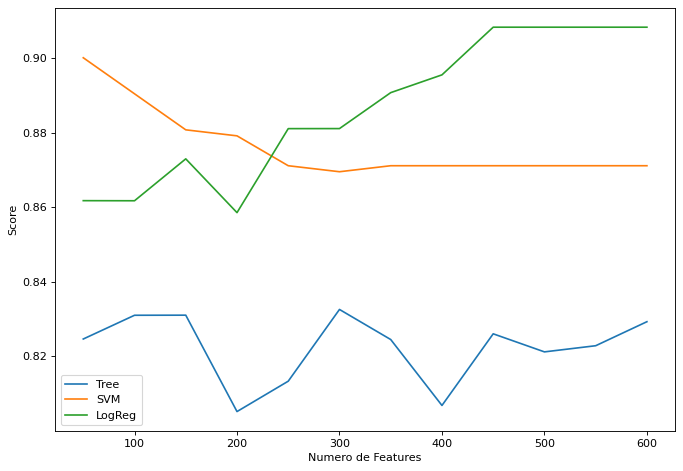

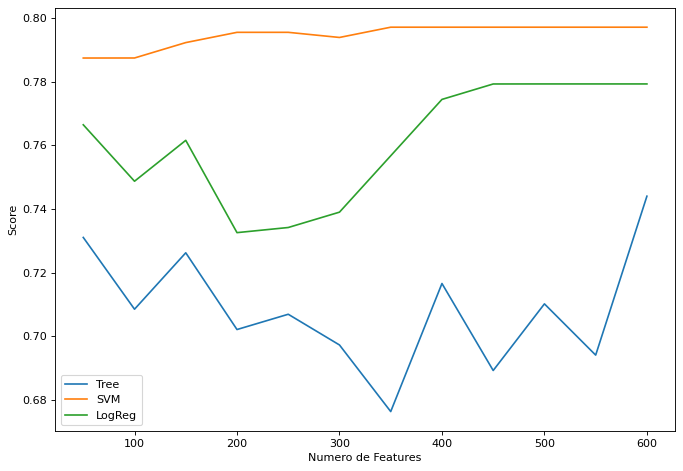

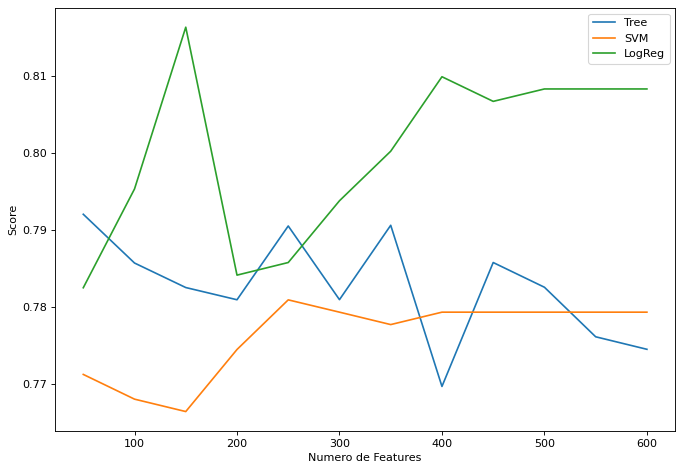

In [24]:

plot_methods(cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list)
plot_methods(dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list)
plot_methods(obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list)


### Dataset Marker

In [25]:

cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list = PCA_CV_iteration(50, df_marker, y_Cirrhosis, iterations=2000)
dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list = PCA_CV_iteration(50, df_marker, y_Diabetes, iterations=2000)
obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list = PCA_CV_iteration(50, df_marker, y_Obesity, iterations=2000)


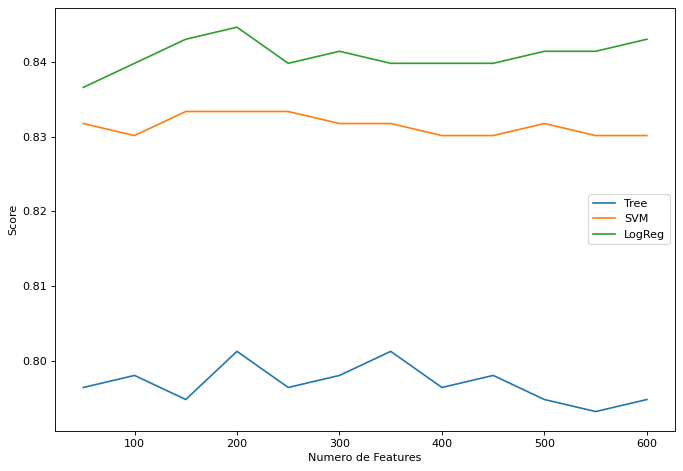

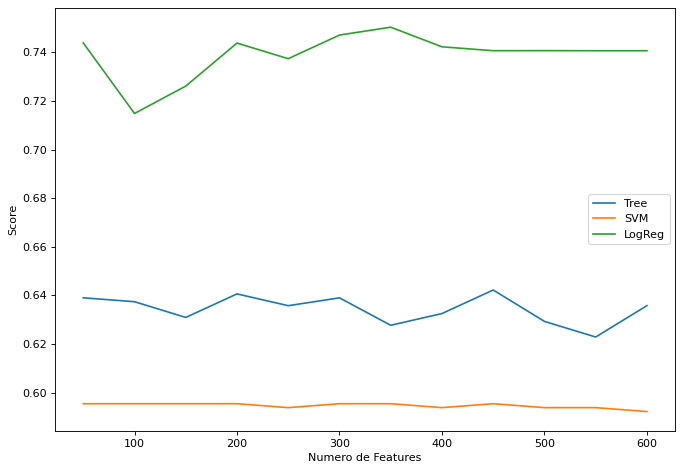

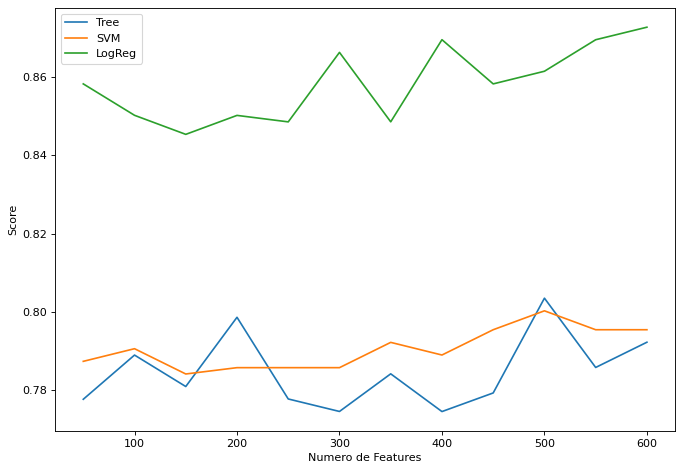

In [26]:

plot_methods(cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list)
plot_methods(dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list)
plot_methods(obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list)


### Datasets Unidos

In [27]:

cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list = PCA_CV_iteration(50, df_all, y_Cirrhosis, iterations=2000)
dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list = PCA_CV_iteration(50, df_all, y_Diabetes, iterations=2000)
obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list = PCA_CV_iteration(50, df_all, y_Obesity, iterations=2000)


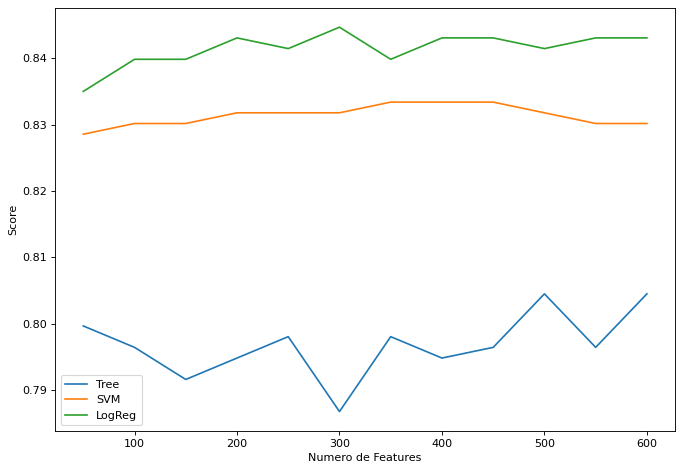

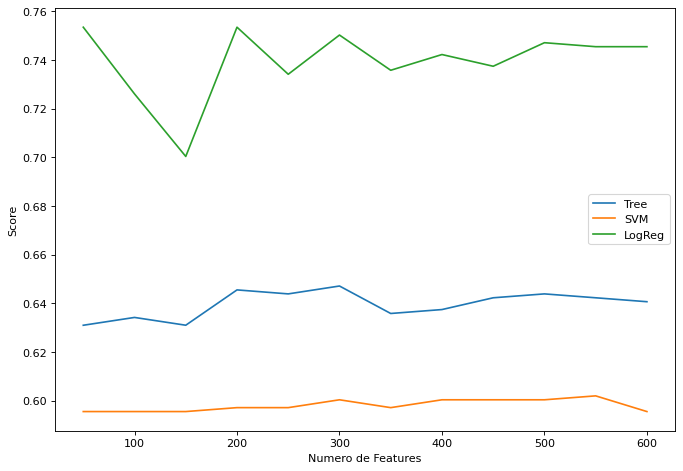

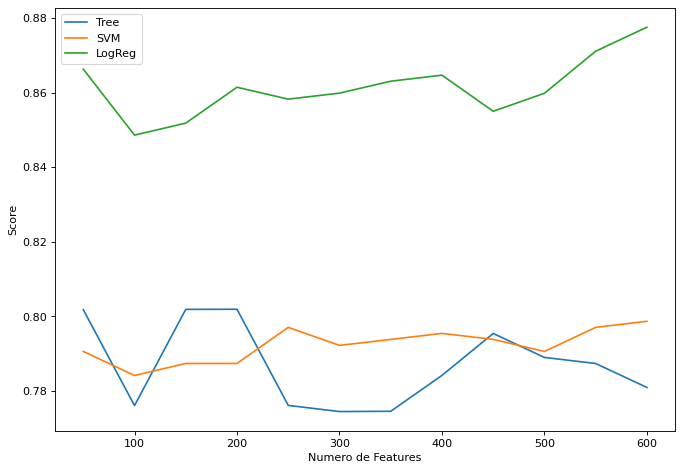

In [31]:

plot_methods(cir_num_features_list, cir_svm_score_list, cir_tree_score_list, cir_lr_score_list)
plot_methods(dia_num_features_list, dia_svm_score_list, dia_tree_score_list, dia_lr_score_list)
plot_methods(obe_num_features_list, obe_svm_score_list, obe_tree_score_list, obe_lr_score_list)


# Optimización mediante Hiperparámetros

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

space = dict()
space['solver'] = ['saga']
space['penalty'] = ['l1','l2']
space['C'] = [0.001,0.01,0.1,1,10,100,1000]

solver_list = ['sag', 'saga']
params = dict(solver=solver_list)

In [34]:
#pca = PCA(n_components=600)
#pca.fit(df_all)
#X_selected= pca.transform(df_all)

#model = LogisticRegression(random_state=0, solver='sag', max_iter = 5000, penalty= 'none', l1_ratio=0.2)
#search = LogisticRegression(random_state=0, solver='sag', max_iter = 5000, penalty= 'none', l1_ratio=0.2)

In [35]:
#cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=1)
#search = GridSearchCV(model, param_grid=params, scoring = "roc_auc",  n_jobs = -1, cv= cv)

In [36]:
#result_Cirrhosis = search.fit(X_selected, y_Cirrhosis)
#result_Diabetes = search.fit(X_selected, y_Diabetes)
#result_Obesity = search.fit(X_selected, y_Obesity)

# Predict Cirrhosis

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

pca = PCA(n_components=600)
pca.fit(df_all)
X_selected= pca.transform(df_all)

#df_all
#X_scaled es abundance
#df_marker

search = LogisticRegression(random_state=0, max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_Cirrhosis, test_size=0.2, random_state=0)
result_Cirrhosis = search.fit(X_train, y_train)

## Confusion Matrix

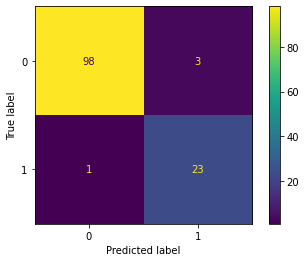

In [38]:
y_pred = result_Cirrhosis.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [39]:
result_Cirrhosis.score(X_test, y_test)

0.968

## Roc Curve

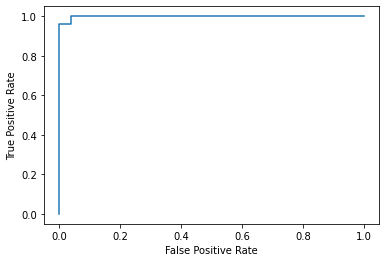

In [40]:
y_score = result_Cirrhosis.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=result_Cirrhosis.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Predict Diabetes

In [41]:
search = LogisticRegression(random_state=0, max_iter = 5000)
#search = svm.SVC()

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_Diabetes, test_size=0.2, random_state=0)
result_Diabetes = search.fit(X_train, y_train)

## Confusion Matrix

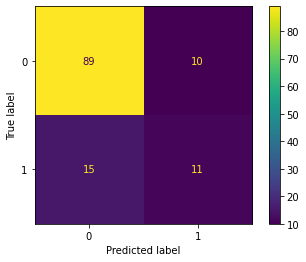

In [42]:
y_pred = result_Diabetes.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [43]:
result_Diabetes.score(X_test, y_test)

0.8

## Roc Curve

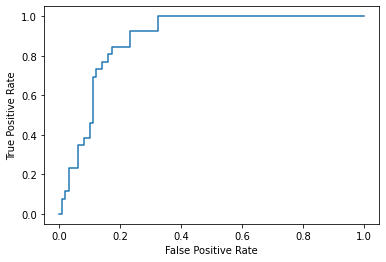

In [44]:
y_score = result_Diabetes.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=result_Diabetes.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Predict Obesity

In [45]:
search = LogisticRegression(random_state=0, max_iter = 5000)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_Obesity, test_size=0.2, random_state=0)
result_Obesity = search.fit(X_train, y_train)

## Confusion Matrix

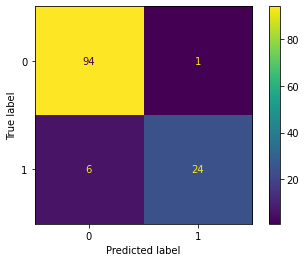

In [46]:
y_pred = result_Obesity.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [47]:
result_Obesity.score(X_test, y_test)

0.944

## Roc Curve

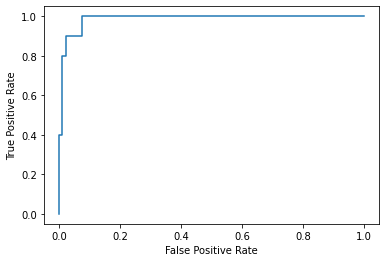

In [48]:
y_score = result_Obesity.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=result_Obesity.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Submission

In [49]:
abundance_test = pd.read_csv("/kaggle/input/simbiontes/biomedata_test_abundance.csv")
marker_test = pd.read_csv("/kaggle/input/simbiontes/biomedata_test_marker.csv")

In [50]:
pca = PCA(n_components=600)
pca.fit(df_all)
X_selected = pca.transform(df_all)

result_Cirrhosis = LogisticRegression(random_state=0, max_iter = 5000).fit(X_selected, y_Cirrhosis)
result_Diabetes = LogisticRegression(random_state=0, max_iter = 5000).fit(X_selected, y_Diabetes)
result_Obesity = LogisticRegression(random_state=0, max_iter = 5000).fit(X_selected, y_Obesity)

In [51]:
abundance_test.fillna(0, inplace= True)
marker_test.fillna(0, inplace= True)

abundance_test.drop(["code_study", "country", "gender"], axis=1, inplace = True)
marker_test.drop(["code_study", "country", "gender"], axis = 1,inplace = True)

abundance_test = pd.DataFrame(scaler.transform(abundance_test), columns = abundance_test.columns)

all_test = pd.concat([marker_test, abundance_test], axis = 1)

In [52]:
all_X = pca.transform(all_test)

In [56]:
Cirrhosis_prediction = result_Cirrhosis.predict(all_X)
Diabetes_prediction = result_Diabetes.predict(all_X)
Obesity_prediction = result_Obesity.predict(all_X)

output = pd.DataFrame({'Id': list(all_test.index), 'Cirrhosis': Cirrhosis_prediction, 'Obesity': Obesity_prediction, 'Diabetes': Diabetes_prediction})
output.to_csv('submission.csv', index=False)